
MDA 5405:DATA ANALYTICS AND KNOWLEDGE ENGINEERING

ASSIGNMENT 2

Pandas and Beautiful Soup Job

Instructions;-
My good Question 

-Site of a know product or company 

-The site must have a table, and content 

-haverst data from the site

-tables and content 

-Stastical analysis On content - 

-Beautiful Soup
-Requests


In [34]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [35]:
# send a request to the list of countries by GDP webpage
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
page = requests.get(url)

In [36]:
page

<Response [200]>

Get data

In [37]:
# parse the HTML content of the webpage using Beautiful Soup

soup = BeautifulSoup(page.content, 'html.parser')

In [38]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by GDP (nominal) - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vect

In [39]:
print(soup.title.text.strip())

List of countries by GDP (nominal) - Wikipedia


In [40]:
 #extract the table data using Pandas
table = soup.find('table', {'class': 'wikitable'})
df = pd.read_html(str(table))[0]

In [41]:
 table

<table border="1" class="wikitable sortable static-row-numbers plainrowheaders srn-white-background" style="text-align:right;">
<caption>GDP (USD million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#c

A.Data analysis from the data which involved;
     -extract knowledge
     -Present the data exploration
B.Visual ideas - Story telling in visuals by use of;
  -pandas, seaborn and matplotlib

In [42]:
df.sample(4)

Country/Territory UN Region IMF[1][13]       World Bank[14]        \
    Country/Territory UN Region   Estimate  Year       Estimate  Year   
58            Hungary    Europe     184651  2022         182281  2021   
94           Cameroon    Africa      44212  2022          45239  2021   
102             Nepal      Asia      39028  2022          36289  2021   
46            Romania    Europe     299885  2022         284088  2021   

    United Nations[15]        
              Estimate  Year  
58              155808  2020  
94               39881  2020  
102              33079  2020  
46              248716  2020

In [43]:
# rename columns
cols = ['country', 'region', 'IMF_estimate', 'IMF_est_year', 'WB_estimate', 'WB_est_year', 'UN_estimate', 'UN_est_year']
df.columns = cols

In [44]:
df.columns

Index(['country', 'region', 'IMF_estimate', 'IMF_est_year', 'WB_estimate',
       'WB_est_year', 'UN_estimate', 'UN_est_year'],
      dtype='object')

In [45]:
# check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       217 non-null    object
 1   region        217 non-null    object
 2   IMF_estimate  217 non-null    object
 3   IMF_est_year  217 non-null    object
 4   WB_estimate   217 non-null    object
 5   WB_est_year   217 non-null    object
 6   UN_estimate   217 non-null    object
 7   UN_est_year   217 non-null    object
dtypes: object(8)
memory usage: 13.7+ KB


In [46]:
# get sample data
df_sample = df.sample(10,random_state=20)

In [47]:
df_sample

,country,region,IMF_estimate,IMF_est_year,WB_estimate,WB_est_year,UN_estimate,UN_est_year
81,Panama,Americas,71085,2022,63605,2021,52938,2020
188,Saint Lucia,Americas,1972,2022,1765,2021,1617,2020
169,Eswatini,Africa,4669,2022,4941,2021,3835,2020
59,Kuwait,Asia,183568,2022,105960,2020,105949,2020
100,Latvia,Europe,40588,2022,38873,2021,33707,2020
73,Venezuela,Americas,82145,2022,482359,2014,106359,2020
165,Barbados,Americas,5788,2022,4901,2021,4440,2020
13,South Korea,Asia,1734207,2022,1798534,2021,1637896,2020
213,Kiribati,Oceania,207,2022,207,2021,181,2020
134,Jamaica,Americas,16104,2022,13638,2021,13812,2020


In [48]:
# check datatypes
df_sample.dtypes

country         object
region          object
IMF_estimate    object
IMF_est_year    object
WB_estimate     object
WB_est_year     object
UN_estimate     object
UN_est_year     object
dtype: object

In [49]:
# convert estimate columns to numeric
df_sample[['IMF_estimate', 'WB_estimate', 'UN_estimate']] = df_sample[['IMF_estimate', 'WB_estimate', 'UN_estimate']].astype(float)

In [50]:
df_sample.dtypes

country          object
region           object
IMF_estimate    float64
IMF_est_year     object
WB_estimate     float64
WB_est_year      object
UN_estimate     float64
UN_est_year      object
dtype: object

In [51]:
df.describe()

,country,region,IMF_estimate,IMF_est_year,WB_estimate,WB_est_year,UN_estimate,UN_est_year
count,217,217,217,217,217,217,217,217
unique,217,6,197,13,211,14,215,11
top,World,Africa,—,2022,—,2021,—,2020
freq,1,55,21,184,7,192,3,205


Visuals

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

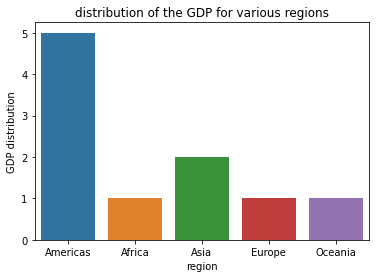

In [415]:
#Data transformation
sns.countplot(data=df_sample, x='region');
plt.title('distribution of the GDP for various regions')
# plt.legend(['Yes','No'], title='No-show');
plt.ylabel('GDP distribution');

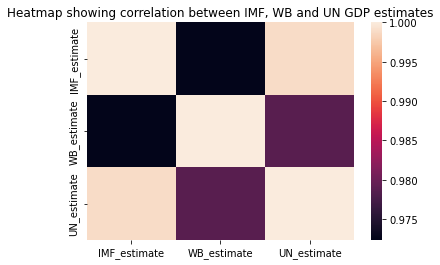

In [402]:
# plot correlation heatmap
sns.heatmap(df_sample.corr());
plt.title('Heatmap showing correlation between IMF, WB and UN GDP estimates')
plt.show();

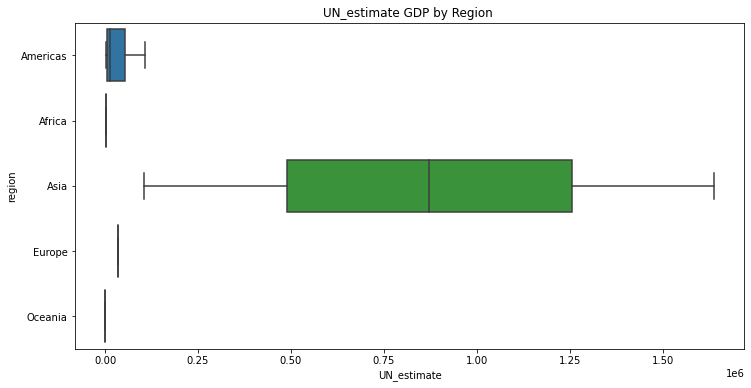

In [410]:
# boxplots

plt.figure(figsize=(12, 6))
sns.boxplot(x='UN_estimate', y='region', data=df_sample)
plt.title('UN estimate GDP by Region ')
plt.ylabel('region')
plt.show()

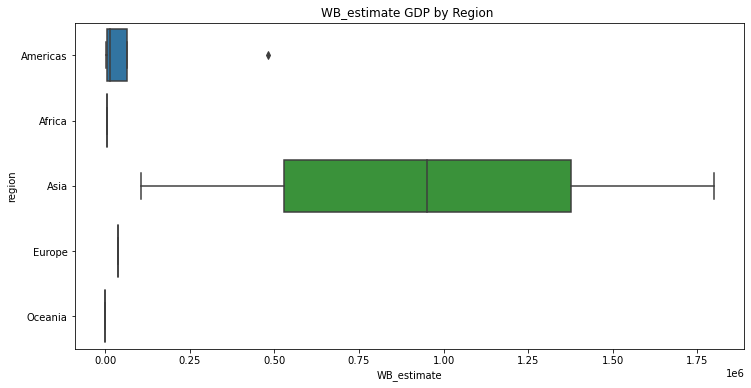

In [411]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='WB_estimate', y='region', data=df_sample)
plt.title('World Bank estimate GDP by Region ')
plt.ylabel('region')
plt.show()

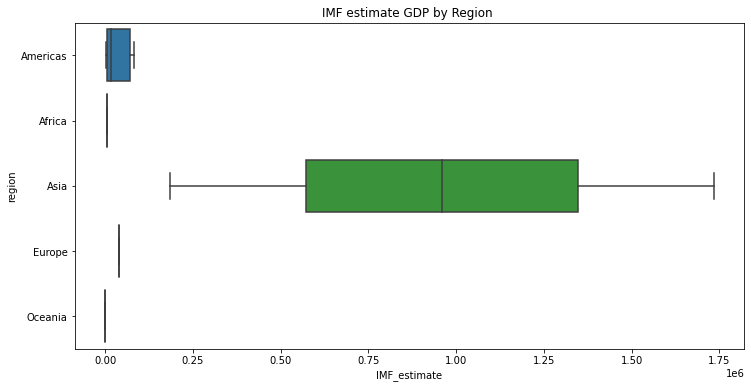

In [412]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='IMF_estimate', y='region', data=df_sample)
plt.title('IMF estimate GDP by Region ')
plt.ylabel('region')
plt.show()